In [1]:
# ✅ STEP 1: Install required libraries
!pip install vaderSentiment wordcloud --quiet

# ✅ STEP 2: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from wordcloud import WordCloud
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# ✅ STEP 3: Load the dataset
from google.colab import files
uploaded = files.upload()  # Upload `twitter_training.csv` from your system

df = pd.read_csv("twitter_training.csv", header=None)
df.columns = ['entity', 'sentiment', 'extra', 'text']
df = df[['entity', 'sentiment', 'text']]
print("📌 Dataset loaded.")
df.head()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.7 MB/s eta 0:00:00


Saving twitter_training.csv to twitter_training (1).csv
📌 Dataset loaded.


,entity,sentiment,text
0,2401,Borderlands,im getting on borderlands and i will murder yo...
1,2401,Borderlands,I am coming to the borders and I will kill you...
2,2401,Borderlands,im getting on borderlands and i will kill you ...
3,2401,Borderlands,im coming on borderlands and i will murder you...
4,2401,Borderlands,im getting on borderlands 2 and i will murder ...


In [2]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|@\S+|#[A-Za-z0-9_]+|[^a-zA-Z\s]", "", text)
    return text.strip()

df['clean_text'] = df['text'].apply(clean_text)


In [3]:
analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
    score = analyzer.polarity_scores(text)['compound']
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df['predicted_sentiment'] = df['clean_text'].apply(get_sentiment)
print("📌 Sentiment analysis complete.")


📌 Sentiment analysis complete.


/tmp/ipython-input-381629724.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='predicted_sentiment', data=df, palette='Set2')


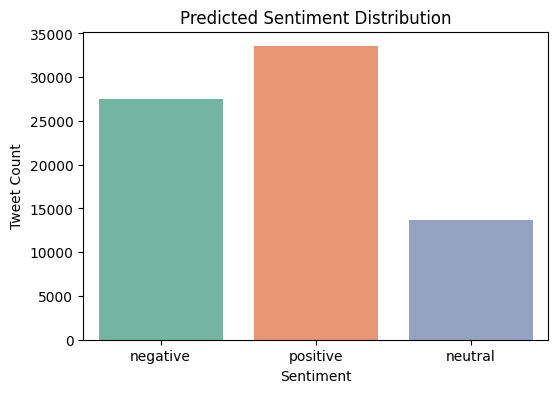

In [4]:
plt.figure(figsize=(6,4))
sns.countplot(x='predicted_sentiment', data=df, palette='Set2')
plt.title("Predicted Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Tweet Count")
plt.show()


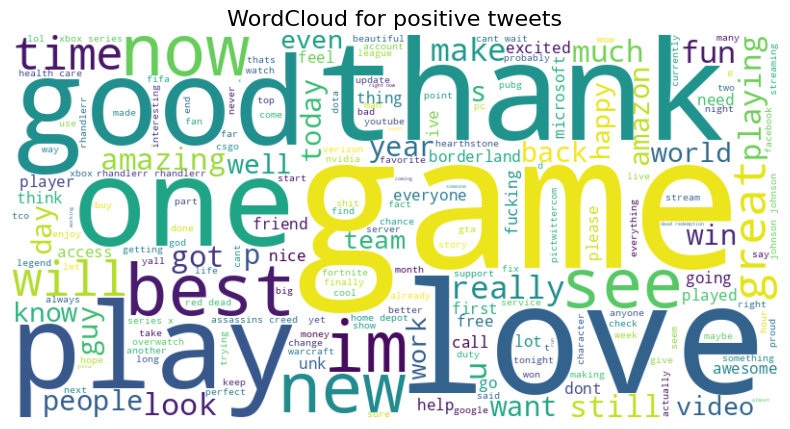

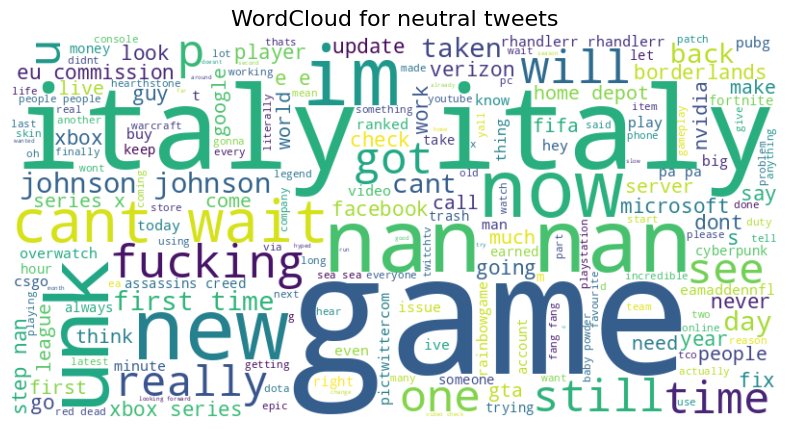

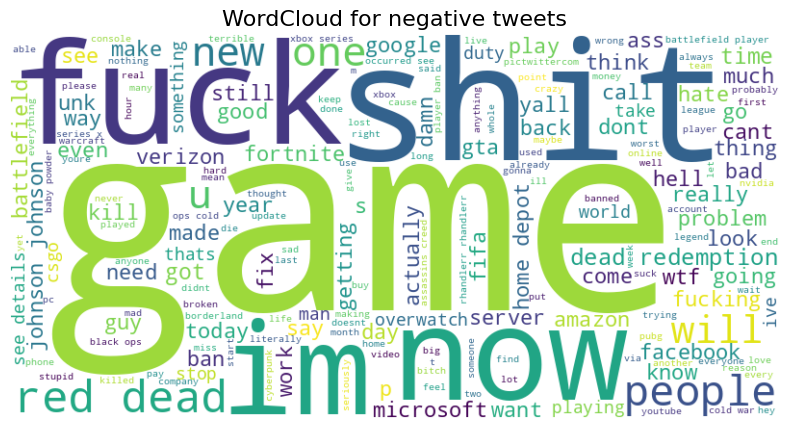

In [5]:
for sentiment in ['positive', 'neutral', 'negative']:
    text = ' '.join(df[df['predicted_sentiment'] == sentiment]['clean_text'])
    wc = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud for {sentiment} tweets", fontsize=16)
    plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


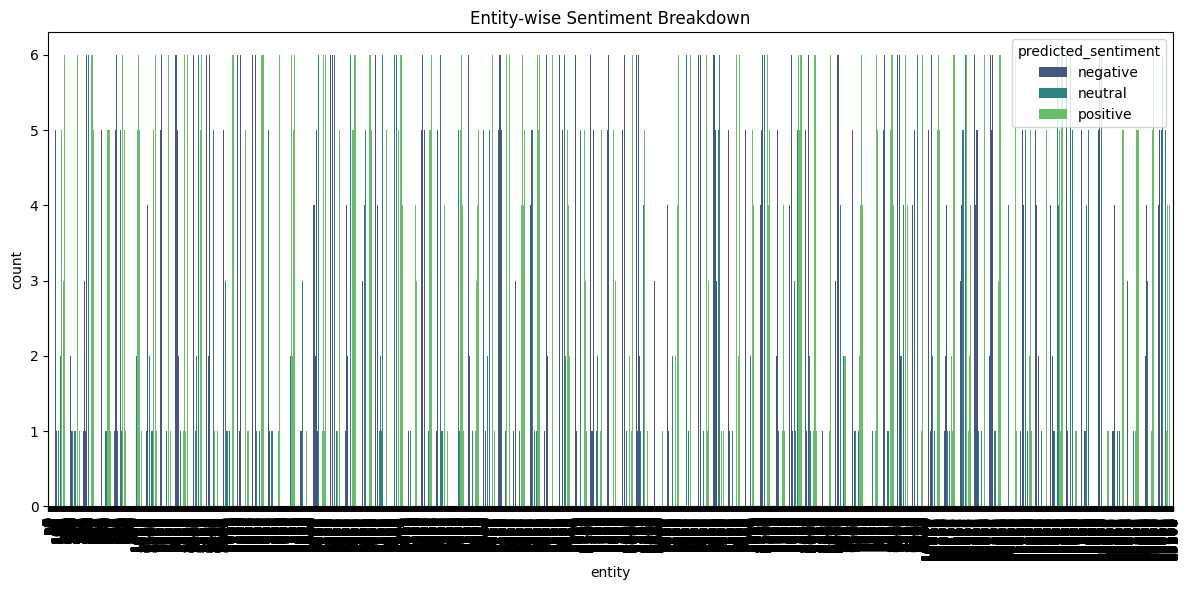

In [6]:
plt.figure(figsize=(12,6))
sns.countplot(x='entity', hue='predicted_sentiment', data=df, palette='viridis')
plt.title("Entity-wise Sentiment Breakdown")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
